# Employed Persons by Major Occupation, by Region, by Sex

#### <span style="color:purple;"><strong>GROUP 7: Barte | Gayapa | Gorospe | Javier </strong></span>
---

### 🔎 Background of the Dataset

>> I'll insert something here

### Source of Data and its Role

>> I'll insert something here

### Dataset Content

>> I'll insert something here
---

### **Data Import & Exploration**

**Import Statements**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

**Loading the Dataset**

In [2]:
# Loads the dataset
df = pd.read_csv("Employed Persons by Major Occupation.csv", skiprows=1)

df.head(20)

,Geolocation,Major Occupation,2018 January Male,2018 January Female,2018 April Male,2018 April Female,2018 July Male,2018 July Female,2018 October Male,2018 October Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
0,PHILIPPINES,Managers,3244.009,3541.049,3093.180,3447.790,2953.884,3474.612,3186.420,3411.726,...,1548.065,1553.296,1545.165,1765.796,1295.256,1754.707,1675.830,1570.561,1055.854,788.437
1,PHILIPPINES,Professionals,808.350,1394.646,828.457,1370.048,778.785,1463.795,830.533,1495.911,...,782.403,1761.261,805.840,1235.408,810.259,1454.679,921.547,1833.471,834.477,1677.566
2,PHILIPPINES,Technicians and Associate Professionals,807.865,727.165,882.455,799.696,916.109,873.420,829.729,813.605,...,891.606,788.750,715.896,897.911,819.012,688.582,911.037,899.234,857.480,941.969
3,PHILIPPINES,Clerical Support Workers,915.972,1430.902,939.934,1464.776,966.424,1364.978,1054.992,1418.932,...,1123.189,1673.830,1122.985,1795.191,1241.779,1836.890,1416.957,1645.740,1306.441,1969.136
4,PHILIPPINES,Service and Sales Workers,2889.855,3265.865,2812.570,3243.550,2826.910,3295.546,2875.541,3474.015,...,3693.635,5963.519,3336.237,5495.375,3176.499,5481.377,3551.249,5134.454,3855.617,6516.319
5,PHILIPPINES,Skilled Agricultural Forestry and Fishery Workers,4506.360,970.830,4234.289,860.640,3983.794,819.147,4166.409,843.326,...,4530.775,1016.905,4682.552,1013.412,4350.293,992.131,4580.855,1536.970,4992.341,1150.298
6,PHILIPPINES,Craft and Related Trades Workers,2548.631,417.556,2888.879,518.554,2840.803,498.019,2773.997,435.056,...,2524.307,414.521,2622.357,570.327,2779.400,529.722,2639.898,600.267,2681.901,592.615
7,PHILIPPINES,Plant and Machine Operators and Assemblers,2378.154,277.367,2312.611,245.822,2347.650,290.580,2348.531,291.953,...,2824.628,367.595,3072.745,590.425,3220.932,251.889,2769.729,593.382,3047.741,206.805
8,PHILIPPINES,Elementary Occupations,7570.992,3965.169,7237.707,3635.600,7357.368,3481.280,7399.804,3590.215,...,8772.099,4728.097,8527.687,4379.661,8484.496,4374.626,8553.933,4074.060,8494.912,5217.773
9,PHILIPPINES,Armed Forces Occupations,90.017,4.281,77.117,2.704,109.681,6.926,82.470,1.858,...,110.813,6.341,54.341,1.732,46.710,3.688,84.489,480.623,85.592,1.196


**Data Dictionary**

In [3]:
# Creating the data dictionary
data_dict = {
    "Column Name": [
        "Geolocation", "Major Occupation",
        "2018 January Male", "2018 January Female",
        "2018 April Male", "2018 April Female",
        "2018 July Male", "2018 July Female",
        "2018 October Male", "2018 October Female",
        "2018 Annual Male", "2018 Annual Female",
        "2018 February Male", "2018 February Female",
        "2018 March Male", "2018 March Female",
        "2018 May Male", "2018 May Female",
        "2018 June Male", "2018 June Female",
        "2018 August Male", "2018 August Female",
        "2018 September Male", "2018 September Female",
        "2018 November Male", "2018 November Female",
        "2018 December Male", "2018 December Female",
        "2019 January Male", "2019 January Female",
        "2019 April Male", "2019 April Female",
        "2019 July Male", "2019 July Female",
        "2019 October Male", "2019 October Female",
        "2019 Annual Male", "2019 Annual Female",
        "2019 February Male", "2019 February Female",
        "2019 March Male", "2019 March Female",
        "2019 May Male", "2019 May Female",
        "2019 June Male", "2019 June Female",
        "2019 August Male", "2019 August Female",
        "2019 September Male", "2019 September Female",
        "2019 November Male", "2019 November Female",
        "2019 December Male", "2019 December Female",
        "2020 January Male", "2020 January Female",
        "2020 April Male", "2020 April Female",
        "2020 July Male", "2020 July Female",
        "2020 October Male", "2020 October Female",
        "2020 Annual Male", "2020 Annual Female",
        "2020 February Male", "2020 February Female",
        "2020 March Male", "2020 March Female",
        "2020 May Male", "2020 May Female",
        "2020 June Male", "2020 June Female",
        "2020 August Male", "2020 August Female",
        "2020 September Male", "2020 September Female",
        "2020 November Male", "2020 November Female",
        "2020 December Male", "2020 December Female",
        "2021 January Male", "2021 January Female",
        "2021 April Male", "2021 April Female",
        "2021 July Male", "2021 July Female",
        "2021 October Male", "2021 October Female",
        "2021 Annual Male", "2021 Annual Female",
        "2021 February Male", "2021 February Female",
        "2021 March Male", "2021 March Female",
        "2021 May Male", "2021 May Female",
        "2021 June Male", "2021 June Female",
        "2021 August Male", "2021 August Female",
        "2021 September Male", "2021 September Female",
        "2021 November Male", "2021 November Female",
        "2021 December Male", "2021 December Female"
    ],
    "Data Type": [
        "String", "String",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float",
        "Float", "Float"
    ],
    "Description": [
        "Geographic location", "Primary job category",
        "Total males in January 2018", "Total females in January 2018",
        "Total males in April 2018", "Total females in April 2018",
        "Total males in July 2018", "Total females in July 2018",
        "Total males in October 2018", "Total females in October 2018",
        "Total annual males in 2018", "Total annual females in 2018",
        "Total males in February 2018", "Total females in February 2018",
        "Total males in March 2018", "Total females in March 2018",
        "Total males in May 2018", "Total females in May 2018",
        "Total males in June 2018", "Total females in June 2018",
        "Total males in August 2018", "Total females in August 2018",
        "Total males in September 2018", "Total females in September 2018",
        "Total males in November 2018", "Total females in November 2018",
        "Total males in December 2018", "Total females in December 2018",
        "Total males in January 2019", "Total females in January 2019",
        "Total males in April 2019", "Total females in April 2019",
        "Total males in July 2019", "Total females in July 2019",
        "Total males in October 2019", "Total females in October 2019",
        "Total annual males in 2019", "Total annual females in 2019",
        "Total males in February 2019", "Total females in February 2019",
        "Total males in March 2019", "Total females in March 2019",
        "Total males in May 2019", "Total females in May 2019",
        "Total males in June 2019", "Total females in June 2019",
        "Total males in August 2019", "Total females in August 2019",
        "Total males in September 2019", "Total females in September 2019",
        "Total males in November 2019", "Total females in November 2019",
        "Total males in December 2019", "Total females in December 2019",
        "Total males in January 2020", "Total females in January 2020",
        "Total males in April 2020", "Total females in April 2020",
        "Total males in July 2020", "Total females in July 2020",
        "Total males in October 2020", "Total females in October 2020",
        "Total annual males in 2020", "Total annual females in 2020",
        "Total males in February 2020", "Total females in February 2020",
        "Total males in March 2020", "Total females in March 2020",
        "Total males in May 2020", "Total females in May 2020",
        "Total males in June 2020", "Total females in June 2020",
        "Total males in August 2020", "Total females in August 2020",
        "Total males in September 2020", "Total females in September 2020",
        "Total males in November 2020", "Total females in November 2020",
        "Total males in December 2020", "Total females in December 2020",
        "Total males in January 2021", "Total females in January 2021",
        "Total males in April 2021", "Total females in April 2021",
        "Total males in July 2021", "Total females in July 2021",
        "Total males in October 2021", "Total females in October 2021",
        "Total annual males in 2021", "Total annual females in 2021",
        "Total males in February 2021", "Total females in February 2021",
        "Total males in March 2021", "Total females in March 2021",
        "Total males in May 2021", "Total females in May 2021",
        "Total males in June 2021", "Total females in June 2021",
        "Total males in August 2021", "Total females in August 2021",
        "Total males in September 2021", "Total females in September 2021",
        "Total males in November 2021", "Total females in November 2021",
        "Total males in December 2021", "Total females in December 2021"
    ]
}

# Create a DataFrame
data_dictionary_df = pd.DataFrame(data_dict)

# Apply borders using Styler
styled_df = data_dictionary_df.style.set_table_styles([
    {'selector': 'th, td', 'props': [('border', '1px solid black')]}
])

# Show the data dictionary
styled_df

,Column Name,Data Type,Description
0,Geolocation,String,Geographic location
1,Major Occupation,String,Primary job category
2,2018 January Male,Float,Total males in January 2018
3,2018 January Female,Float,Total females in January 2018
4,2018 April Male,Float,Total males in April 2018
5,2018 April Female,Float,Total females in April 2018
6,2018 July Male,Float,Total males in July 2018
7,2018 July Female,Float,Total females in July 2018
8,2018 October Male,Float,Total males in October 2018
9,2018 October Female,Float,Total females in October 2018


### **Identifying Data and Attributes**

**Data Information**

In [4]:
# Display information about the dataframe
print("\nInformation about the dataset:")
df.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 106 entries, Geolocation to 2021 December Female
dtypes: float64(54), object(52)
memory usage: 149.2+ KB


**Statistical Information**

In [5]:
# Display summary statistics of the dataframe
print("\nSummary statistics of the dataset:")
df.describe()


Summary statistics of the dataset:


,2018 January Male,2018 January Female,2018 April Male,2018 April Female,2018 July Male,2018 July Female,2018 October Male,2018 October Female,2018 Annual Male,2018 Annual Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,286.224500,177.720333,281.191100,173.213111,278.682311,172.981144,283.871400,175.295522,282.492467,174.802644,...,297.794633,203.045717,294.286744,197.169283,291.384839,192.981022,301.172472,204.097350,302.359511,211.801256
std,765.388149,488.749150,739.853072,470.000115,736.139526,467.101254,748.510382,476.663619,747.087917,475.209177,...,837.333927,610.755105,824.488489,570.802056,814.115787,569.406934,825.418421,549.036953,843.121618,662.931232
min,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.234000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.162000,12.672500,30.193500,16.728500,30.115250,18.308250,28.958750,14.158000,29.456750,15.761500,...,31.997750,14.495000,28.968750,16.236500,30.429750,10.571500,24.625000,11.559250,27.748500,12.044500
50%,91.079500,52.575500,93.261000,47.035500,92.208000,48.457000,95.468000,49.823500,91.211500,51.611500,...,86.426500,51.208500,86.554000,52.366000,94.420500,55.953500,90.824000,60.204000,88.536500,47.925000
75%,279.085750,164.736250,254.195250,153.616000,245.836500,156.221500,267.223000,159.288000,268.632750,158.901250,...,252.068500,167.888250,251.036250,154.524750,229.442500,154.038750,260.464000,173.603750,271.491500,172.447500
max,7570.992000,3965.169000,7237.707000,3635.600000,7357.368000,3481.280000,7399.804000,3590.215000,7391.468000,3668.066000,...,8772.099000,5963.519000,8527.687000,5495.375000,8484.496000,5481.377000,8553.933000,5134.454000,8494.912000,6516.319000


**Dataset Columns**

In [6]:
# Display data columns of the dataframe
print("\nColumns of the raw dataset:")
df.columns



Columns of the raw dataset:


Index(['Geolocation', 'Major Occupation', '2018 January Male',
       '2018 January Female', '2018 April Male', '2018 April Female',
       '2018 July Male', '2018 July Female', '2018 October Male',
       '2018 October Female',
       ...
       '2021 June Male', '2021 June Female', '2021 August Male',
       '2021 August Female', '2021 September Male', '2021 September Female',
       '2021 November Male', '2021 November Female', '2021 December Male',
       '2021 December Female'],
      dtype='object', length=106)

**Type of Dataset**

In [7]:
# Display data types of the dataframe
print("\nData types of the raw dataset:")
df.dtypes


Data types of the raw dataset:


Geolocation               object
Major Occupation          object
2018 January Male        float64
2018 January Female      float64
2018 April Male          float64
                          ...   
2021 September Female    float64
2021 November Male       float64
2021 November Female     float64
2021 December Male       float64
2021 December Female     float64
Length: 106, dtype: object

In [8]:
# Function to check data types
def check_data_types(df):
    numerical_columns = []
    categorical_columns = []
    mixed_columns = []

    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number):
            numerical_columns.append(column)
        elif df[column].dtype == 'object':
            categorical_columns.append(column)
        else:
            mixed_columns.append(column)

    return {
        'Numerical': numerical_columns,
        'Categorical': categorical_columns,
        'Mixed': mixed_columns
    }

# Checking data types
data_types = check_data_types(df)
data_types

{'Numerical': ['2018 January Male',
  '2018 January Female',
  '2018 April Male',
  '2018 April Female',
  '2018 July Male',
  '2018 July Female',
  '2018 October Male',
  '2018 October Female',
  '2018 Annual Male',
  '2018 Annual Female',
  '2019 January Male',
  '2019 January Female',
  '2019 April Male',
  '2019 April Female',
  '2019 July Male',
  '2019 July Female',
  '2019 October Male',
  '2019 Annual Male',
  '2019 Annual Female',
  '2020 January Male',
  '2020 January Female',
  '2020 April Male',
  '2020 April Female',
  '2020 July Male',
  '2020 July Female',
  '2020 October Male',
  '2020 October Female',
  '2020 Annual Male',
  '2020 Annual Female',
  '2021 January Male',
  '2021 January Female',
  '2021 April Male',
  '2021 April Female',
  '2021 July Male',
  '2021 July Female',
  '2021 October Male',
  '2021 October Female',
  '2021 Annual Male',
  '2021 February Male',
  '2021 February Female',
  '2021 March Male',
  '2021 March Female',
  '2021 May Male',
  '2021 May

**Numerical, categorical, or mixed**

In [9]:
# Check if columns are numerical, categorical, or mixed.
def check_column_type(df):
    column_types = {}

    for column in df.columns:
        unique_types = df[column].apply(type).nunique()

        if pd.api.types.is_numeric_dtype(df[column]):
            column_types[column] = 'numerical'
        elif pd.api.types.is_string_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
            column_types[column] = 'categorical'
        elif unique_types > 1:
            column_types[column] = 'mixed'
        else:
            column_types[column] = 'unknown'

    return column_types

column_type_dict = check_column_type(df)


for column, column_type in column_type_dict.items():
    print(f"Column '{column}' is of type: {column_type}")

Column 'Geolocation' is of type: categorical
Column 'Major Occupation' is of type: categorical
Column '2018 January Male' is of type: numerical
Column '2018 January Female' is of type: numerical
Column '2018 April Male' is of type: numerical
Column '2018 April Female' is of type: numerical
Column '2018 July Male' is of type: numerical
Column '2018 July Female' is of type: numerical
Column '2018 October Male' is of type: numerical
Column '2018 October Female' is of type: numerical
Column '2018 Annual Male' is of type: numerical
Column '2018 Annual Female' is of type: numerical
Column '2018 February Male' is of type: categorical
Column '2018 February Female' is of type: categorical
Column '2018 March Male' is of type: categorical
Column '2018 March Female' is of type: categorical
Column '2018 May Male' is of type: categorical
Column '2018 May Female' is of type: categorical
Column '2018 June Male' is of type: categorical
Column '2018 June Female' is of type: categorical
Column '2018 Augu

### **Data Quality Assessment**

**Cleaning rows**

In [10]:
# Drops all rows with PHILIPPINES in the Geolocation column
df_filtered = df[df['Geolocation'] != 'PHILIPPINES']

df_filtered.head(5)

,Geolocation,Major Occupation,2018 January Male,2018 January Female,2018 April Male,2018 April Female,2018 July Male,2018 July Female,2018 October Male,2018 October Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
10,NCR,Managers,393.268,448.821,412.267,448.700,383.575,435.604,448.532,473.166,...,238.375,327.137,288.115,283.240,219.721,339.790,259.102,318.265,203.138,174.510
11,NCR,Professionals,199.566,211.795,193.381,204.823,191.332,234.955,209.982,226.309,...,175.975,263.837,168.893,202.638,146.808,157.710,227.893,329.200,199.804,311.004
12,NCR,Technicians and Associate Professionals,164.642,127.503,229.759,190.970,207.958,169.456,220.397,155.177,...,216.809,195.469,222.639,242.008,154.115,125.369,244.412,203.428,261.300,229.533
13,NCR,Clerical Support Workers,263.171,366.055,284.011,373.538,277.363,355.856,305.263,399.884,...,254.755,410.450,324.953,447.853,316.869,419.971,364.640,459.347,383.226,491.205
14,NCR,Service and Sales Workers,519.710,519.266,503.853,475.251,503.214,505.897,490.274,525.902,...,590.284,717.866,588.735,881.520,584.778,678.961,647.273,695.412,692.999,977.382


**Removing unnecessary columns**

In [11]:
# Declares months to drop (null columns)
dropped_months = ["February", "March", "May", "June", "August", "September", "November", "December"]

# Function to drop all declared months for only the years 2018, 2019, 2020
df_filtered = df_filtered.drop(columns=[
    col for col in df_filtered.columns 
    if any(month in col for month in dropped_months) and any(year in col for year in ["2018", "2019", "2020"])
])

df_filtered.iloc[:, :15].head(20)

,Geolocation,Major Occupation,2018 January Male,2018 January Female,2018 April Male,2018 April Female,2018 July Male,2018 July Female,2018 October Male,2018 October Female,2018 Annual Male,2018 Annual Female,2019 January Male,2019 January Female,2019 April Male
10,NCR,Managers,393.268,448.821,412.267,448.700,383.575,435.604,448.532,473.166,409.411,451.573,372.520,397.328,410.381
11,NCR,Professionals,199.566,211.795,193.381,204.823,191.332,234.955,209.982,226.309,198.565,219.471,199.141,249.356,189.204
12,NCR,Technicians and Associate Professionals,164.642,127.503,229.759,190.970,207.958,169.456,220.397,155.177,205.689,160.777,193.275,164.637,213.310
13,NCR,Clerical Support Workers,263.171,366.055,284.011,373.538,277.363,355.856,305.263,399.884,282.452,373.833,345.595,440.500,308.202
14,NCR,Service and Sales Workers,519.710,519.266,503.853,475.251,503.214,505.897,490.274,525.902,504.263,506.579,517.466,605.185,564.047
15,NCR,Skilled Agricultural Forestry and Fishery Workers,8.109,0.252,15.520,0.696,8.645,0.737,16.907,1.170,12.295,0.714,7.301,0.726,10.443
16,NCR,Craft and Related Trades Workers,379.324,60.515,417.649,74.920,411.242,67.475,401.214,52.633,402.357,63.886,476.798,66.158,435.411
17,NCR,Plant and Machine Operators and Assemblers,473.279,34.127,393.816,26.759,459.502,38.580,439.037,30.296,441.409,32.441,449.373,39.245,438.028
18,NCR,Elementary Occupations,570.339,364.205,502.132,358.258,555.600,378.197,493.923,368.890,530.499,367.388,589.790,357.016,549.533
19,NCR,Armed Forces Occupations,3.526,0.999,4.793,1.255,9.459,0.365,8.432,0.921,6.553,0.885,9.585,0.228,2.904


**Remove year 2018 (since date range should be 2019 to present)**

In [12]:
# Drops all columns in the year 2018 (out of data range scope)
df_filtered = df_filtered.drop(columns=[col for col in df_filtered.columns if "2018" in col])

df_filtered.head(20)

,Geolocation,Major Occupation,2019 January Male,2019 January Female,2019 April Male,2019 April Female,2019 July Male,2019 July Female,2019 October Male,2019 October Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
10,NCR,Managers,372.520,397.328,410.381,460.372,435.000,414.000,452.696,419.058,...,238.375,327.137,288.115,283.240,219.721,339.790,259.102,318.265,203.138,174.510
11,NCR,Professionals,199.141,249.356,189.204,240.872,218.000,229.000,247.756,271.257,...,175.975,263.837,168.893,202.638,146.808,157.710,227.893,329.200,199.804,311.004
12,NCR,Technicians and Associate Professionals,193.275,164.637,213.310,178.293,217.000,164.000,192.622,179.903,...,216.809,195.469,222.639,242.008,154.115,125.369,244.412,203.428,261.300,229.533
13,NCR,Clerical Support Workers,345.595,440.500,308.202,430.998,323.000,439.000,323.923,484.717,...,254.755,410.450,324.953,447.853,316.869,419.971,364.640,459.347,383.226,491.205
14,NCR,Service and Sales Workers,517.466,605.185,564.047,583.954,618.000,614.000,554.993,585.930,...,590.284,717.866,588.735,881.520,584.778,678.961,647.273,695.412,692.999,977.382
15,NCR,Skilled Agricultural Forestry and Fishery Workers,7.301,0.726,10.443,0.269,17.000,1.000,6.140,..,...,8.631,3.696,0.636,0.000,0.000,0.000,1.654,0.000,7.471,0.000
16,NCR,Craft and Related Trades Workers,476.798,66.158,435.411,69.163,420.000,65.000,454.848,61.804,...,452.226,71.963,432.658,94.274,396.089,72.868,368.002,35.931,337.566,46.517
17,NCR,Plant and Machine Operators and Assemblers,449.373,39.245,438.028,38.761,442.000,37.000,453.602,36.653,...,463.481,18.916,466.772,11.349,495.293,49.882,452.043,44.757,489.604,23.551
18,NCR,Elementary Occupations,589.790,357.016,549.533,333.791,565.000,389.000,523.875,380.666,...,759.815,379.292,671.128,347.165,731.931,427.391,646.021,408.538,665.926,415.889
19,NCR,Armed Forces Occupations,9.585,0.228,2.904,0.503,7.000,0.000,7.054,..,...,23.406,5.920,3.919,0.000,5.354,2.984,1.760,6.361,6.701,0.000


**Removing unnecessary columns**

In [13]:
# Drops the annual column for all years
df_filtered = df_filtered.drop(columns=[col for col in df_filtered.columns if "Annual" in col])

df_filtered.iloc[:, :15].head(20)

,Geolocation,Major Occupation,2019 January Male,2019 January Female,2019 April Male,2019 April Female,2019 July Male,2019 July Female,2019 October Male,2019 October Female,2020 January Male,2020 January Female,2020 April Male,2020 April Female,2020 July Male
10,NCR,Managers,372.520,397.328,410.381,460.372,435.000,414.000,452.696,419.058,396.067,454.649,282.682,293.795,269.832
11,NCR,Professionals,199.141,249.356,189.204,240.872,218.000,229.000,247.756,271.257,207.701,265.060,161.767,200.202,163.860
12,NCR,Technicians and Associate Professionals,193.275,164.637,213.310,178.293,217.000,164.000,192.622,179.903,169.413,144.949,124.671,109.463,143.695
13,NCR,Clerical Support Workers,345.595,440.500,308.202,430.998,323.000,439.000,323.923,484.717,329.908,469.327,297.842,414.131,291.802
14,NCR,Service and Sales Workers,517.466,605.185,564.047,583.954,618.000,614.000,554.993,585.930,604.652,575.750,527.885,491.200,603.139
15,NCR,Skilled Agricultural Forestry and Fishery Workers,7.301,0.726,10.443,0.269,17.000,1.000,6.140,..,8.161,0.360,3.514,0.240,5.427
16,NCR,Craft and Related Trades Workers,476.798,66.158,435.411,69.163,420.000,65.000,454.848,61.804,402.628,63.551,359.118,54.383,342.205
17,NCR,Plant and Machine Operators and Assemblers,449.373,39.245,438.028,38.761,442.000,37.000,453.602,36.653,445.663,38.096,399.531,25.692,508.196
18,NCR,Elementary Occupations,589.790,357.016,549.533,333.791,565.000,389.000,523.875,380.666,620.063,322.949,585.304,386.316,529.232
19,NCR,Armed Forces Occupations,9.585,0.228,2.904,0.503,7.000,0.000,7.054,..,14.476,5.347,2.156,0.495,4.698


**Bininng Values**

In [14]:
# Declares the quarters in the dataset
# Group/Bin Values
quarters = [
    ("January", ["January", "February", "March"]),
    ("April", ["April", "May", "June"]),
    ("July", ["July", "August", "September"]),
    ("October", ["October", "November", "December"]),
]

genders = ["Male", "Female"]

# Gets the values for the quarters in the year 2021 for both Male and Female separately
# Values are placed in the declared quarters as the average of each three months per quarter
for gender in genders:
    for quarter, months in quarters:
        df_filtered[f"2021 {quarter} {gender}"] = df_filtered[
            [f"2021 {month} {gender}" for month in months]
        ].mean(axis=1)

df_filtered.iloc[:, -24:].head(20)

,2021 January Male,2021 January Female,2021 April Male,2021 April Female,2021 July Male,2021 July Female,2021 October Male,2021 October Female,2021 February Male,2021 February Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
10,301.815333,278.180667,241.389000,392.558000,255.811333,317.340000,239.498667,291.940000,336.628,459.808,...,238.375,327.137,288.115,283.240,219.721,339.790,259.102,318.265,203.138,174.510
11,216.829333,181.207000,178.503333,250.441667,161.843667,194.672000,206.715667,294.277333,251.271,280.742,...,175.975,263.837,168.893,202.638,146.808,157.710,227.893,329.200,199.804,311.004
12,206.877667,129.118667,205.647667,144.131333,200.730667,185.889000,253.414667,210.471333,248.194,226.826,...,216.809,195.469,222.639,242.008,154.115,125.369,244.412,203.428,261.300,229.533
13,311.972333,275.839667,285.360667,369.986333,314.690667,424.387333,359.715000,473.298000,244.325,353.544,...,254.755,410.450,324.953,447.853,316.869,419.971,364.640,459.347,383.226,491.205
14,586.487667,486.931333,577.318000,687.680000,584.595667,752.578000,651.943000,784.261667,561.178,639.941,...,590.284,717.866,588.735,881.520,584.778,678.961,647.273,695.412,692.999,977.382
15,11.502667,1.482333,7.286333,3.627667,1.999000,0.367000,6.051667,0.685667,6.018,3.806,...,8.631,3.696,0.636,0.000,0.000,0.000,1.654,0.000,7.471,0.000
16,414.247000,38.242333,394.456667,61.664667,396.328000,75.942667,359.159333,46.038000,386.565,54.439,...,452.226,71.963,432.658,94.274,396.089,72.868,368.002,35.931,337.566,46.517
17,452.245000,19.482667,445.119000,23.995000,483.902667,31.282333,459.205000,35.003333,459.807,33.068,...,463.481,18.916,466.772,11.349,495.293,49.882,452.043,44.757,489.604,23.551
18,572.613333,299.814333,662.744667,378.250667,692.260000,363.298000,664.606333,392.705000,601.772,434.915,...,759.815,379.292,671.128,347.165,731.931,427.391,646.021,408.538,665.926,415.889
19,5.265333,0.796000,14.106333,3.232667,4.694000,1.233333,3.981667,2.836333,9.575,2.343,...,23.406,5.920,3.919,0.000,5.354,2.984,1.760,6.361,6.701,0.000


**Renaming columns**

In [15]:
# Renames the previously declared quarters to their proper quarter denomination
df_filtered.rename(columns=lambda x: x.replace("January", "Q1")
                                     .replace("April", "Q2")
                                     .replace("July", "Q3")
                                     .replace("October", "Q4"), inplace=True)

df_filtered.head(20)

,Geolocation,Major Occupation,2019 Q1 Male,2019 Q1 Female,2019 Q2 Male,2019 Q2 Female,2019 Q3 Male,2019 Q3 Female,2019 Q4 Male,2019 Q4 Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
10,NCR,Managers,372.520,397.328,410.381,460.372,435.000,414.000,452.696,419.058,...,238.375,327.137,288.115,283.240,219.721,339.790,259.102,318.265,203.138,174.510
11,NCR,Professionals,199.141,249.356,189.204,240.872,218.000,229.000,247.756,271.257,...,175.975,263.837,168.893,202.638,146.808,157.710,227.893,329.200,199.804,311.004
12,NCR,Technicians and Associate Professionals,193.275,164.637,213.310,178.293,217.000,164.000,192.622,179.903,...,216.809,195.469,222.639,242.008,154.115,125.369,244.412,203.428,261.300,229.533
13,NCR,Clerical Support Workers,345.595,440.500,308.202,430.998,323.000,439.000,323.923,484.717,...,254.755,410.450,324.953,447.853,316.869,419.971,364.640,459.347,383.226,491.205
14,NCR,Service and Sales Workers,517.466,605.185,564.047,583.954,618.000,614.000,554.993,585.930,...,590.284,717.866,588.735,881.520,584.778,678.961,647.273,695.412,692.999,977.382
15,NCR,Skilled Agricultural Forestry and Fishery Workers,7.301,0.726,10.443,0.269,17.000,1.000,6.140,..,...,8.631,3.696,0.636,0.000,0.000,0.000,1.654,0.000,7.471,0.000
16,NCR,Craft and Related Trades Workers,476.798,66.158,435.411,69.163,420.000,65.000,454.848,61.804,...,452.226,71.963,432.658,94.274,396.089,72.868,368.002,35.931,337.566,46.517
17,NCR,Plant and Machine Operators and Assemblers,449.373,39.245,438.028,38.761,442.000,37.000,453.602,36.653,...,463.481,18.916,466.772,11.349,495.293,49.882,452.043,44.757,489.604,23.551
18,NCR,Elementary Occupations,589.790,357.016,549.533,333.791,565.000,389.000,523.875,380.666,...,759.815,379.292,671.128,347.165,731.931,427.391,646.021,408.538,665.926,415.889
19,NCR,Armed Forces Occupations,9.585,0.228,2.904,0.503,7.000,0.000,7.054,..,...,23.406,5.920,3.919,0.000,5.354,2.984,1.760,6.361,6.701,0.000


In [16]:
# Declares the months to be dropped (data under the columns are already integrated in respective quarters)
dropped_months = ["February", "March", "May", "June", "August", "September", "November", "December"]

# Drops the remaining months for the year 2021
df_filtered = df_filtered.drop(columns=[
    col for col in df_filtered.columns 
    if any(month in col for month in dropped_months) and any(year in col for year in ["2021"])
])

df_filtered.head(20)

,Geolocation,Major Occupation,2019 Q1 Male,2019 Q1 Female,2019 Q2 Male,2019 Q2 Female,2019 Q3 Male,2019 Q3 Female,2019 Q4 Male,2019 Q4 Female,...,2020 Q4 Male,2020 Q4 Female,2021 Q1 Male,2021 Q1 Female,2021 Q2 Male,2021 Q2 Female,2021 Q3 Male,2021 Q3 Female,2021 Q4 Male,2021 Q4 Female
10,NCR,Managers,372.520,397.328,410.381,460.372,435.000,414.000,452.696,419.058,...,245.933,370.470,301.815333,278.180667,241.389000,392.558000,255.811333,317.340000,239.498667,291.940000
11,NCR,Professionals,199.141,249.356,189.204,240.872,218.000,229.000,247.756,271.257,...,199.901,229.747,216.829333,181.207000,178.503333,250.441667,161.843667,194.672000,206.715667,294.277333
12,NCR,Technicians and Associate Professionals,193.275,164.637,213.310,178.293,217.000,164.000,192.622,179.903,...,207.302,169.984,206.877667,129.118667,205.647667,144.131333,200.730667,185.889000,253.414667,210.471333
13,NCR,Clerical Support Workers,345.595,440.500,308.202,430.998,323.000,439.000,323.923,484.717,...,280.186,382.026,311.972333,275.839667,285.360667,369.986333,314.690667,424.387333,359.715000,473.298000
14,NCR,Service and Sales Workers,517.466,605.185,564.047,583.954,618.000,614.000,554.993,585.930,...,537.231,638.461,586.487667,486.931333,577.318000,687.680000,584.595667,752.578000,651.943000,784.261667
15,NCR,Skilled Agricultural Forestry and Fishery Workers,7.301,0.726,10.443,0.269,17.000,1.000,6.140,..,...,9.300,0.704,11.502667,1.482333,7.286333,3.627667,1.999000,0.367000,6.051667,0.685667
16,NCR,Craft and Related Trades Workers,476.798,66.158,435.411,69.163,420.000,65.000,454.848,61.804,...,339.170,42.851,414.247000,38.242333,394.456667,61.664667,396.328000,75.942667,359.159333,46.038000
17,NCR,Plant and Machine Operators and Assemblers,449.373,39.245,438.028,38.761,442.000,37.000,453.602,36.653,...,465.437,31.134,452.245000,19.482667,445.119000,23.995000,483.902667,31.282333,459.205000,35.003333
18,NCR,Elementary Occupations,589.790,357.016,549.533,333.791,565.000,389.000,523.875,380.666,...,549.273,272.487,572.613333,299.814333,662.744667,378.250667,692.260000,363.298000,664.606333,392.705000
19,NCR,Armed Forces Occupations,9.585,0.228,2.904,0.503,7.000,0.000,7.054,..,...,4.451,0.000,5.265333,0.796000,14.106333,3.232667,4.694000,1.233333,3.981667,2.836333


**Checking null values with cleaned dataset**

In [17]:
# Function to check null values
print(df_filtered.isnull().sum().sum())
print((df_filtered == "").sum().sum()) 

0
0


**Check Data Types**

In [18]:
# Function to check data types
print(df_filtered.dtypes)

Geolocation          object
Major Occupation     object
2019 Q1 Male        float64
2019 Q1 Female      float64
2019 Q2 Male        float64
2019 Q2 Female      float64
2019 Q3 Male        float64
2019 Q3 Female      float64
2019 Q4 Male        float64
2019 Q4 Female       object
2020 Q1 Male        float64
2020 Q1 Female      float64
2020 Q2 Male        float64
2020 Q2 Female      float64
2020 Q3 Male        float64
2020 Q3 Female      float64
2020 Q4 Male        float64
2020 Q4 Female      float64
2021 Q1 Male        float64
2021 Q1 Female      float64
2021 Q2 Male        float64
2021 Q2 Female      float64
2021 Q3 Male        float64
2021 Q3 Female      float64
2021 Q4 Male        float64
2021 Q4 Female      float64
dtype: object


**Replace ".." values to zero**

In [19]:
# Checks all cells with values of ".."
dot_counts = (df_filtered == "..").sum()

dot_counts[dot_counts > 0]

2019 Q4 Female    2
dtype: int64

In [20]:
# As ".." is considered null or zero in the dataset, respectively changes all those cases to float zero
df_filtered.replace("..", 0.000, inplace=True)

(df_filtered == "..").sum().sum()

0

In [21]:
# Checking again of data types
print(df_filtered.dtypes)

Geolocation          object
Major Occupation     object
2019 Q1 Male        float64
2019 Q1 Female      float64
2019 Q2 Male        float64
2019 Q2 Female      float64
2019 Q3 Male        float64
2019 Q3 Female      float64
2019 Q4 Male        float64
2019 Q4 Female       object
2020 Q1 Male        float64
2020 Q1 Female      float64
2020 Q2 Male        float64
2020 Q2 Female      float64
2020 Q3 Male        float64
2020 Q3 Female      float64
2020 Q4 Male        float64
2020 Q4 Female      float64
2021 Q1 Male        float64
2021 Q1 Female      float64
2021 Q2 Male        float64
2021 Q2 Female      float64
2021 Q3 Male        float64
2021 Q3 Female      float64
2021 Q4 Male        float64
2021 Q4 Female      float64
dtype: object


In [22]:
df_filtered.head(5)

,Geolocation,Major Occupation,2019 Q1 Male,2019 Q1 Female,2019 Q2 Male,2019 Q2 Female,2019 Q3 Male,2019 Q3 Female,2019 Q4 Male,2019 Q4 Female,...,2020 Q4 Male,2020 Q4 Female,2021 Q1 Male,2021 Q1 Female,2021 Q2 Male,2021 Q2 Female,2021 Q3 Male,2021 Q3 Female,2021 Q4 Male,2021 Q4 Female
10,NCR,Managers,372.520,397.328,410.381,460.372,435.0,414.0,452.696,419.058,...,245.933,370.470,301.815333,278.180667,241.389000,392.558000,255.811333,317.340000,239.498667,291.940000
11,NCR,Professionals,199.141,249.356,189.204,240.872,218.0,229.0,247.756,271.257,...,199.901,229.747,216.829333,181.207000,178.503333,250.441667,161.843667,194.672000,206.715667,294.277333
12,NCR,Technicians and Associate Professionals,193.275,164.637,213.310,178.293,217.0,164.0,192.622,179.903,...,207.302,169.984,206.877667,129.118667,205.647667,144.131333,200.730667,185.889000,253.414667,210.471333
13,NCR,Clerical Support Workers,345.595,440.500,308.202,430.998,323.0,439.0,323.923,484.717,...,280.186,382.026,311.972333,275.839667,285.360667,369.986333,314.690667,424.387333,359.715000,473.298000
14,NCR,Service and Sales Workers,517.466,605.185,564.047,583.954,618.0,614.0,554.993,585.930,...,537.231,638.461,586.487667,486.931333,577.318000,687.680000,584.595667,752.578000,651.943000,784.261667


**Converting values**

In [23]:
# Converts values to numeric type
df_filtered = df_filtered.apply(pd.to_numeric, errors='ignore')

# Rounds values to three decimal places
df_filtered = df_filtered.round(3)

df_filtered.head(20)

,Geolocation,Major Occupation,2019 Q1 Male,2019 Q1 Female,2019 Q2 Male,2019 Q2 Female,2019 Q3 Male,2019 Q3 Female,2019 Q4 Male,2019 Q4 Female,...,2020 Q4 Male,2020 Q4 Female,2021 Q1 Male,2021 Q1 Female,2021 Q2 Male,2021 Q2 Female,2021 Q3 Male,2021 Q3 Female,2021 Q4 Male,2021 Q4 Female
10,NCR,Managers,372.520,397.328,410.381,460.372,435.000,414.000,452.696,419.058,...,245.933,370.470,301.815,278.181,241.389,392.558,255.811,317.340,239.499,291.940
11,NCR,Professionals,199.141,249.356,189.204,240.872,218.000,229.000,247.756,271.257,...,199.901,229.747,216.829,181.207,178.503,250.442,161.844,194.672,206.716,294.277
12,NCR,Technicians and Associate Professionals,193.275,164.637,213.310,178.293,217.000,164.000,192.622,179.903,...,207.302,169.984,206.878,129.119,205.648,144.131,200.731,185.889,253.415,210.471
13,NCR,Clerical Support Workers,345.595,440.500,308.202,430.998,323.000,439.000,323.923,484.717,...,280.186,382.026,311.972,275.840,285.361,369.986,314.691,424.387,359.715,473.298
14,NCR,Service and Sales Workers,517.466,605.185,564.047,583.954,618.000,614.000,554.993,585.930,...,537.231,638.461,586.488,486.931,577.318,687.680,584.596,752.578,651.943,784.262
15,NCR,Skilled Agricultural Forestry and Fishery Workers,7.301,0.726,10.443,0.269,17.000,1.000,6.140,0.000,...,9.300,0.704,11.503,1.482,7.286,3.628,1.999,0.367,6.052,0.686
16,NCR,Craft and Related Trades Workers,476.798,66.158,435.411,69.163,420.000,65.000,454.848,61.804,...,339.170,42.851,414.247,38.242,394.457,61.665,396.328,75.943,359.159,46.038
17,NCR,Plant and Machine Operators and Assemblers,449.373,39.245,438.028,38.761,442.000,37.000,453.602,36.653,...,465.437,31.134,452.245,19.483,445.119,23.995,483.903,31.282,459.205,35.003
18,NCR,Elementary Occupations,589.790,357.016,549.533,333.791,565.000,389.000,523.875,380.666,...,549.273,272.487,572.613,299.814,662.745,378.251,692.260,363.298,664.606,392.705
19,NCR,Armed Forces Occupations,9.585,0.228,2.904,0.503,7.000,0.000,7.054,0.000,...,4.451,0.000,5.265,0.796,14.106,3.233,4.694,1.233,3.982,2.836


In [24]:
# Final checking of data types
print(df_filtered.dtypes)

Geolocation          object
Major Occupation     object
2019 Q1 Male        float64
2019 Q1 Female      float64
2019 Q2 Male        float64
2019 Q2 Female      float64
2019 Q3 Male        float64
2019 Q3 Female      float64
2019 Q4 Male        float64
2019 Q4 Female      float64
2020 Q1 Male        float64
2020 Q1 Female      float64
2020 Q2 Male        float64
2020 Q2 Female      float64
2020 Q3 Male        float64
2020 Q3 Female      float64
2020 Q4 Male        float64
2020 Q4 Female      float64
2021 Q1 Male        float64
2021 Q1 Female      float64
2021 Q2 Male        float64
2021 Q2 Female      float64
2021 Q3 Male        float64
2021 Q3 Female      float64
2021 Q4 Male        float64
2021 Q4 Female      float64
dtype: object


**Reset Index**

In [25]:
# Function to reset index
df_filtered.reset_index(drop=True, inplace=True)

df_filtered.head(20)

,Geolocation,Major Occupation,2019 Q1 Male,2019 Q1 Female,2019 Q2 Male,2019 Q2 Female,2019 Q3 Male,2019 Q3 Female,2019 Q4 Male,2019 Q4 Female,...,2020 Q4 Male,2020 Q4 Female,2021 Q1 Male,2021 Q1 Female,2021 Q2 Male,2021 Q2 Female,2021 Q3 Male,2021 Q3 Female,2021 Q4 Male,2021 Q4 Female
0,NCR,Managers,372.520,397.328,410.381,460.372,435.000,414.000,452.696,419.058,...,245.933,370.470,301.815,278.181,241.389,392.558,255.811,317.340,239.499,291.940
1,NCR,Professionals,199.141,249.356,189.204,240.872,218.000,229.000,247.756,271.257,...,199.901,229.747,216.829,181.207,178.503,250.442,161.844,194.672,206.716,294.277
2,NCR,Technicians and Associate Professionals,193.275,164.637,213.310,178.293,217.000,164.000,192.622,179.903,...,207.302,169.984,206.878,129.119,205.648,144.131,200.731,185.889,253.415,210.471
3,NCR,Clerical Support Workers,345.595,440.500,308.202,430.998,323.000,439.000,323.923,484.717,...,280.186,382.026,311.972,275.840,285.361,369.986,314.691,424.387,359.715,473.298
4,NCR,Service and Sales Workers,517.466,605.185,564.047,583.954,618.000,614.000,554.993,585.930,...,537.231,638.461,586.488,486.931,577.318,687.680,584.596,752.578,651.943,784.262
5,NCR,Skilled Agricultural Forestry and Fishery Workers,7.301,0.726,10.443,0.269,17.000,1.000,6.140,0.000,...,9.300,0.704,11.503,1.482,7.286,3.628,1.999,0.367,6.052,0.686
6,NCR,Craft and Related Trades Workers,476.798,66.158,435.411,69.163,420.000,65.000,454.848,61.804,...,339.170,42.851,414.247,38.242,394.457,61.665,396.328,75.943,359.159,46.038
7,NCR,Plant and Machine Operators and Assemblers,449.373,39.245,438.028,38.761,442.000,37.000,453.602,36.653,...,465.437,31.134,452.245,19.483,445.119,23.995,483.903,31.282,459.205,35.003
8,NCR,Elementary Occupations,589.790,357.016,549.533,333.791,565.000,389.000,523.875,380.666,...,549.273,272.487,572.613,299.814,662.745,378.251,692.260,363.298,664.606,392.705
9,NCR,Armed Forces Occupations,9.585,0.228,2.904,0.503,7.000,0.000,7.054,0.000,...,4.451,0.000,5.265,0.796,14.106,3.233,4.694,1.233,3.982,2.836


**Export to csv file the final dataset**

In [26]:
# Exporting to csv
df_filtered.to_csv("Test_Cleaned_DF.csv", index=False)

print("File 'Test_Cleaned_DF.xlsx' has been saved successfully.")

File 'Test_Cleaned_DF.xlsx' has been saved successfully.


In [27]:
# Test to check if csv is exported successfully
df_new = pd.read_csv("Test_Cleaned_DF.csv")

df_new.head(20)

,Geolocation,Major Occupation,2019 Q1 Male,2019 Q1 Female,2019 Q2 Male,2019 Q2 Female,2019 Q3 Male,2019 Q3 Female,2019 Q4 Male,2019 Q4 Female,...,2020 Q4 Male,2020 Q4 Female,2021 Q1 Male,2021 Q1 Female,2021 Q2 Male,2021 Q2 Female,2021 Q3 Male,2021 Q3 Female,2021 Q4 Male,2021 Q4 Female
0,NCR,Managers,372.520,397.328,410.381,460.372,435.000,414.000,452.696,419.058,...,245.933,370.470,301.815,278.181,241.389,392.558,255.811,317.340,239.499,291.940
1,NCR,Professionals,199.141,249.356,189.204,240.872,218.000,229.000,247.756,271.257,...,199.901,229.747,216.829,181.207,178.503,250.442,161.844,194.672,206.716,294.277
2,NCR,Technicians and Associate Professionals,193.275,164.637,213.310,178.293,217.000,164.000,192.622,179.903,...,207.302,169.984,206.878,129.119,205.648,144.131,200.731,185.889,253.415,210.471
3,NCR,Clerical Support Workers,345.595,440.500,308.202,430.998,323.000,439.000,323.923,484.717,...,280.186,382.026,311.972,275.840,285.361,369.986,314.691,424.387,359.715,473.298
4,NCR,Service and Sales Workers,517.466,605.185,564.047,583.954,618.000,614.000,554.993,585.930,...,537.231,638.461,586.488,486.931,577.318,687.680,584.596,752.578,651.943,784.262
5,NCR,Skilled Agricultural Forestry and Fishery Workers,7.301,0.726,10.443,0.269,17.000,1.000,6.140,0.000,...,9.300,0.704,11.503,1.482,7.286,3.628,1.999,0.367,6.052,0.686
6,NCR,Craft and Related Trades Workers,476.798,66.158,435.411,69.163,420.000,65.000,454.848,61.804,...,339.170,42.851,414.247,38.242,394.457,61.665,396.328,75.943,359.159,46.038
7,NCR,Plant and Machine Operators and Assemblers,449.373,39.245,438.028,38.761,442.000,37.000,453.602,36.653,...,465.437,31.134,452.245,19.483,445.119,23.995,483.903,31.282,459.205,35.003
8,NCR,Elementary Occupations,589.790,357.016,549.533,333.791,565.000,389.000,523.875,380.666,...,549.273,272.487,572.613,299.814,662.745,378.251,692.260,363.298,664.606,392.705
9,NCR,Armed Forces Occupations,9.585,0.228,2.904,0.503,7.000,0.000,7.054,0.000,...,4.451,0.000,5.265,0.796,14.106,3.233,4.694,1.233,3.982,2.836


**Convert from wide to long format**

In [28]:
df_long = df_filtered.melt(
    id_vars=["Geolocation", "Major Occupation"], 
    var_name="Year_Quarter_Gender", 
    value_name="Value"
)

# Function to extract Year, Quarter, and Gender
df_long[['Year', 'Quarter', 'Type']] = df_long['Year_Quarter_Gender'].str.extract(r'(\d{4})\s(Q\d)?\s?(Male|Female)?')

# Function to group by categories and sum values
df_long = df_long.groupby(["Geolocation", "Major Occupation", "Year", "Quarter", "Type"], as_index=False)["Value"].sum()

# Converts back to wide format (pivoting the data)
df_final = df_long.pivot(index=["Geolocation", "Major Occupation", "Year", "Quarter"], 
                         columns="Type", values="Value").reset_index()

# Sorting values by Geolocation, Year, and Quarter
df_final = df_final.sort_values(by=["Geolocation", "Year", "Quarter"])

df_final.head(20)

Type,Geolocation,Major Occupation,Year,Quarter,Female,Male
0,BARMM,Armed Forces Occupations,2019,Q1,0.000,4.913
12,BARMM,Clerical Support Workers,2019,Q1,3.094,3.469
24,BARMM,Craft and Related Trades Workers,2019,Q1,5.036,36.280
36,BARMM,Elementary Occupations,2019,Q1,61.566,181.032
48,BARMM,Managers,2019,Q1,75.293,99.566
60,BARMM,Plant and Machine Operators and Assemblers,2019,Q1,0.000,49.755
72,BARMM,Professionals,2019,Q1,23.197,9.336
84,BARMM,Service and Sales Workers,2019,Q1,50.228,43.095
96,BARMM,Skilled Agricultural Forestry and Fishery Workers,2019,Q1,41.261,380.673
108,BARMM,Technicians and Associate Professionals,2019,Q1,3.954,8.075


In [29]:
# Function to reset index
df_final = df_final.reset_index()

df_final.head(20)

Type,index,Geolocation,Major Occupation,Year,Quarter,Female,Male
0,0,BARMM,Armed Forces Occupations,2019,Q1,0.000,4.913
1,12,BARMM,Clerical Support Workers,2019,Q1,3.094,3.469
2,24,BARMM,Craft and Related Trades Workers,2019,Q1,5.036,36.280
3,36,BARMM,Elementary Occupations,2019,Q1,61.566,181.032
4,48,BARMM,Managers,2019,Q1,75.293,99.566
5,60,BARMM,Plant and Machine Operators and Assemblers,2019,Q1,0.000,49.755
6,72,BARMM,Professionals,2019,Q1,23.197,9.336
7,84,BARMM,Service and Sales Workers,2019,Q1,50.228,43.095
8,96,BARMM,Skilled Agricultural Forestry and Fishery Workers,2019,Q1,41.261,380.673
9,108,BARMM,Technicians and Associate Professionals,2019,Q1,3.954,8.075


In [30]:
# Drops the index column
df_final = df_final.drop(columns=["index"])

df_final.head(20)

Type,Geolocation,Major Occupation,Year,Quarter,Female,Male
0,BARMM,Armed Forces Occupations,2019,Q1,0.000,4.913
1,BARMM,Clerical Support Workers,2019,Q1,3.094,3.469
2,BARMM,Craft and Related Trades Workers,2019,Q1,5.036,36.280
3,BARMM,Elementary Occupations,2019,Q1,61.566,181.032
4,BARMM,Managers,2019,Q1,75.293,99.566
5,BARMM,Plant and Machine Operators and Assemblers,2019,Q1,0.000,49.755
6,BARMM,Professionals,2019,Q1,23.197,9.336
7,BARMM,Service and Sales Workers,2019,Q1,50.228,43.095
8,BARMM,Skilled Agricultural Forestry and Fishery Workers,2019,Q1,41.261,380.673
9,BARMM,Technicians and Associate Professionals,2019,Q1,3.954,8.075


In [31]:
# Exporting cleaned dataset to csv
df_final.to_csv("Final_Test_Cleaned_DF.csv", index=False)

#print("File 'Test_Cleaned_DF.csv' has been saved successfully.")

In [32]:
# Exporting cleaned dataset to excel
df_final.to_excel("Final_Test_Cleaned_DF.xlsx", index=False)

print("File 'Test_Cleaned_DF.xlsx' has been saved successfully.")

File 'Test_Cleaned_DF.xlsx' has been saved successfully.


In [33]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Final_Test_Cleaned_DF.csv')

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head(5))

First few rows of the dataset:
  Geolocation                  Major Occupation  Year Quarter  Female     Male
0       BARMM          Armed Forces Occupations  2019      Q1   0.000    4.913
1       BARMM          Clerical Support Workers  2019      Q1   3.094    3.469
2       BARMM  Craft and Related Trades Workers  2019      Q1   5.036   36.280
3       BARMM            Elementary Occupations  2019      Q1  61.566  181.032
4       BARMM                          Managers  2019      Q1  75.293   99.566


#### **Identifying Data and Attributes**

**Statistical Information**

In [34]:
# Display summary statistics of the dataframe
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
              Year       Female         Male
count  2040.000000  2040.000000  2040.000000
mean   2020.000000    93.810858   149.497919
std       0.816697   128.634516   176.778445
min    2019.000000     0.000000     0.000000
25%    2019.000000    12.487250    27.047500
50%    2020.000000    46.981500    81.420000
75%    2021.000000   120.285250   211.595000
max    2021.000000  1078.202000  1156.352000


**Data Types**

In [35]:
print("\nData types of the dataset:")
print(df.dtypes)


Data types of the dataset:
Geolocation          object
Major Occupation     object
Year                  int64
Quarter              object
Female              float64
Male                float64
dtype: object


**Data Dictionary**

In [36]:
from tabulate import tabulate

# Define the data dictionary
data_dict = {
    'Column Name': ['Geolocation', 'Major Occupation', 'Year', 'Quarter', 'Female', 'Male'],
    'Data Type': ['object', 'object', 'int64', 'object', 'float64', 'float64'],
    'Description': [
        'Geographical location of the data point',
        'The primary occupation of individuals in the dataset',
        'The year the data was collected',
        'The quarter of the year (e.g., Q1, Q2)',
        'Number of females in the dataset',
        'Number of males in the dataset'
    ]
}

# Create a DataFrame
data_dictionary_df = pd.DataFrame(data_dict)

# Apply borders using Styler
styled_df = data_dictionary_df.style.set_table_styles([
    {'selector': 'th, td', 'props': [('border', '1px solid black')]}
])

# Show the data dictionary
styled_df

,Column Name,Data Type,Description
0,Geolocation,object,Geographical location of the data point
1,Major Occupation,object,The primary occupation of individuals in the dataset
2,Year,int64,The year the data was collected
3,Quarter,object,"The quarter of the year (e.g., Q1, Q2)"
4,Female,float64,Number of females in the dataset
5,Male,float64,Number of males in the dataset


#### **Determining the Type of Dataset**

**Numerical, categorical, or mixed**

In [37]:
# Check if columns are numerical, categorical, or mixed
def check_column_type(df):
    column_types = {}

    for column in df.columns:
        unique_types = df[column].apply(type).nunique()

        if pd.api.types.is_numeric_dtype(df[column]):
            column_types[column] = 'numerical'
        elif pd.api.types.is_string_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
            column_types[column] = 'categorical'
        elif unique_types > 1:
            column_types[column] = 'mixed'
        else:
            column_types[column] = 'unknown'

    return column_types

column_type_dict = check_column_type(df)


for column, column_type in column_type_dict.items():
    print(f"Column '{column}' is of type: {column_type}")

Column 'Geolocation' is of type: categorical
Column 'Major Occupation' is of type: categorical
Column 'Year' is of type: numerical
Column 'Quarter' is of type: categorical
Column 'Female' is of type: numerical
Column 'Male' is of type: numerical


**Dataset Information**

In [38]:
# Display information about the dataframe
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Geolocation       2040 non-null   object 
 1   Major Occupation  2040 non-null   object 
 2   Year              2040 non-null   int64  
 3   Quarter           2040 non-null   object 
 4   Female            2040 non-null   float64
 5   Male              2040 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 95.8+ KB
None


#### **Data Quality Assessment**

**Checking for Null Values**

In [39]:
# Check for null values
print("\nNull values in the dataset:")
print(df.isnull().sum())


Null values in the dataset:
Geolocation         0
Major Occupation    0
Year                0
Quarter             0
Female              0
Male                0
dtype: int64


**Checking for Duplicates**

In [40]:
# Check for duplicates
duplicate_rows = df[df.duplicated(keep=False)]  # Keep all duplicates
num_duplicates = df.duplicated().sum()  # Count total duplicates

# Print the number of duplicate rows
print(f"\nNumber of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


#### **Quantitative Statistics**

**Checking for Outliers**

In [41]:
import pandas as pd

# Check for outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Detect outliers in the 'Female' and 'Male' columns
female_outliers = detect_outliers_iqr(df['Female'])
male_outliers = detect_outliers_iqr(df['Male'])

# Print the number of outliers found
print(f"Number of outliers in 'Female': {len(female_outliers)}")
print(f"Number of outliers in 'Male': {len(male_outliers)}")

# Optionally, print the outlier values
if not female_outliers.empty:
    print("\nOutliers in 'Female':")
    print(female_outliers)

if not male_outliers.empty:
    print("\nOutliers in 'Male':")
    print(male_outliers)

Number of outliers in 'Female': 163
Number of outliers in 'Male': 117

Outliers in 'Female':
481     440.500
483     357.016
484     397.328
487     605.185
491     430.998
         ...   
1897    306.385
1917    312.311
2013    316.422
2017    290.769
2033    300.989
Name: Female, Length: 163, dtype: float64

Outliers in 'Male':
48      508.849
68      520.367
78      502.419
98      516.917
483     589.790
         ...   
1763    510.980
1773    551.123
1783    499.973
1793    556.698
1903    511.468
Name: Male, Length: 117, dtype: float64


>>**To visualize the outliers**

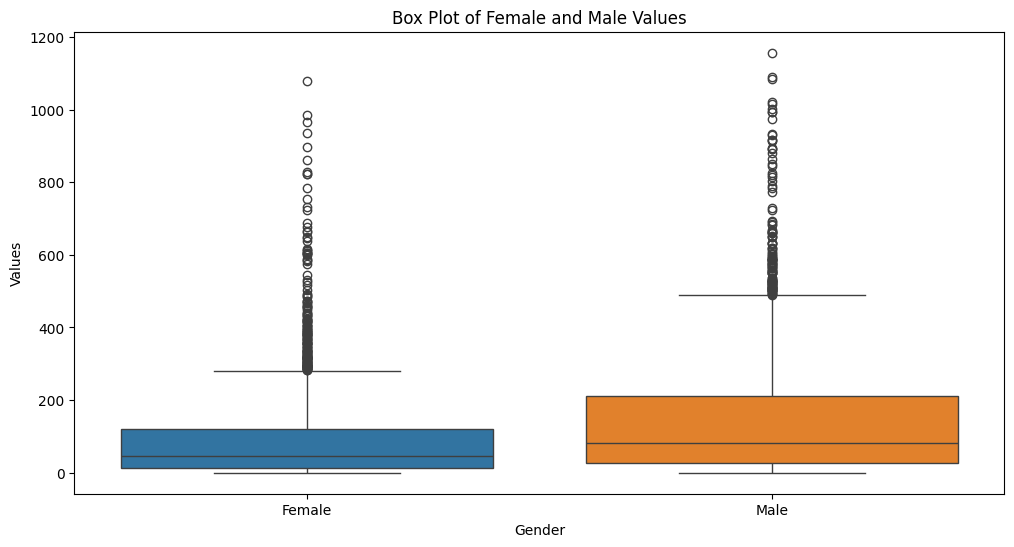

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Female', 'Male']])
plt.title('Box Plot of Female and Male Values')
plt.ylabel('Values')
plt.xlabel('Gender')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

>> **Scatter Plot for Male and Female Employment Values**

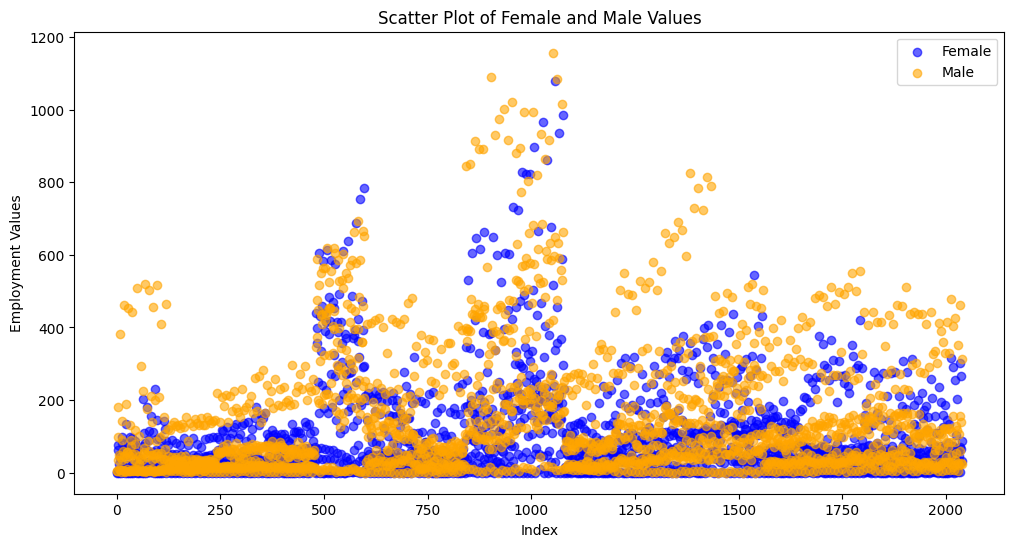

In [43]:
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Female'], color='blue', label='Female', alpha=0.6)
plt.scatter(df.index, df['Male'], color='orange', label='Male', alpha=0.6)
plt.title('Scatter Plot of Female and Male Values')
plt.ylabel('Employment Values')
plt.xlabel('Index')
plt.legend()
plt.show()

>> **Trends Over Time**

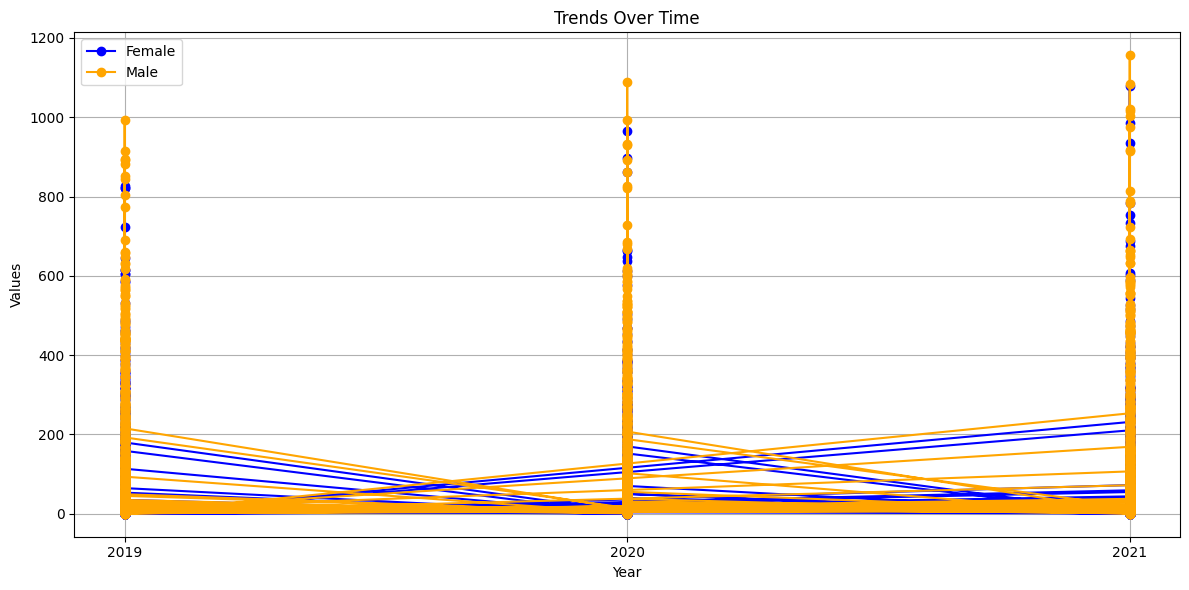

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Female'], marker='o', linestyle='-', color='blue', label='Female')
plt.plot(df['Year'], df['Male'], marker='o', linestyle='-', color='orange', label='Male')
plt.title('Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.xticks(df['Year'].unique())
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
# Remove outliers in the 'Female' and 'Male' columns
# df['Female'] = remove_outliers_iqr(df['Female'])
# df['Male'] = remove_outliers_iqr(df['Male'])

# # Drop rows with NaN values (which were outliers)
# df_cleaned = df.dropna()

# # Print the cleaned DataFrame
# print("Cleaned DataFrame:")
# print(df_cleaned)

# # Optionally, print the number of outliers removed
# num_outliers_female = len(df) - len(df_cleaned[df_cleaned['Female'].notna()])
# num_outliers_male = len(df) - len(df_cleaned[df_cleaned['Male'].notna()])

# print(f"\nNumber of outliers removed from 'Female': {num_outliers_female}")
# print(f"Number of outliers removed from 'Male': {num_outliers_male}")

>> **Comparison of Male and Female Employment through the Years**

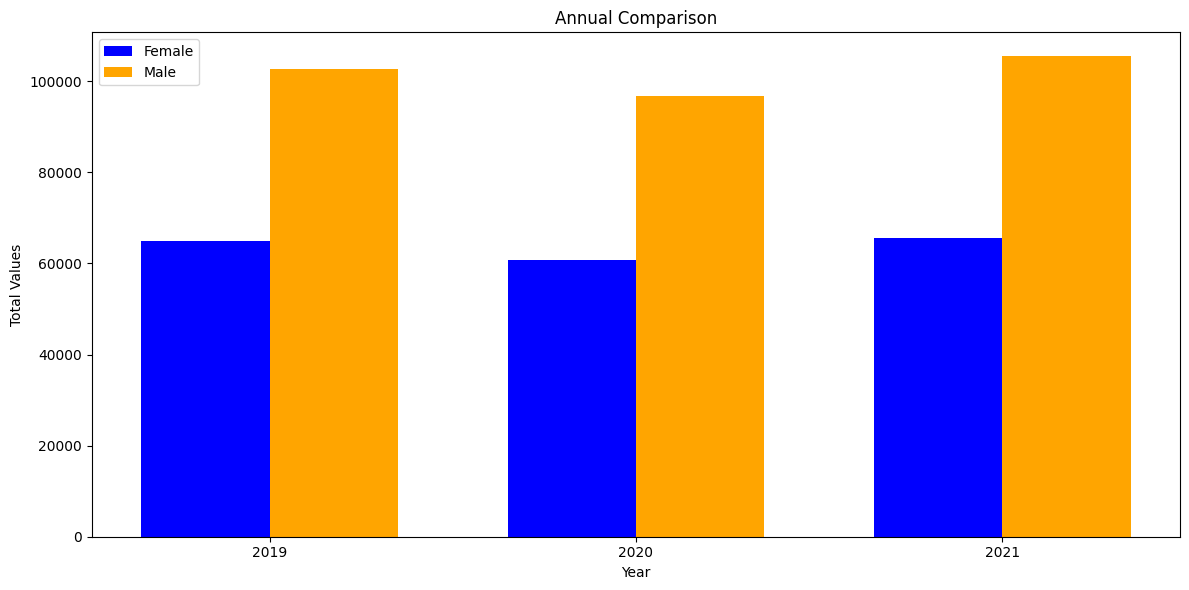

In [46]:
annual_data = df.groupby('Year').sum().reset_index()
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(annual_data['Year']))

plt.bar(x - bar_width/2, annual_data['Female'], width=bar_width, label='Female', color='blue')
plt.bar(x + bar_width/2, annual_data['Male'], width=bar_width, label='Male', color='orange')
plt.title('Annual Comparison')
plt.xlabel('Year')
plt.ylabel('Total Values')
plt.xticks(x, annual_data['Year'])
plt.legend()
plt.tight_layout()
plt.show()

>>**Quarterly Female Values Heatmap**

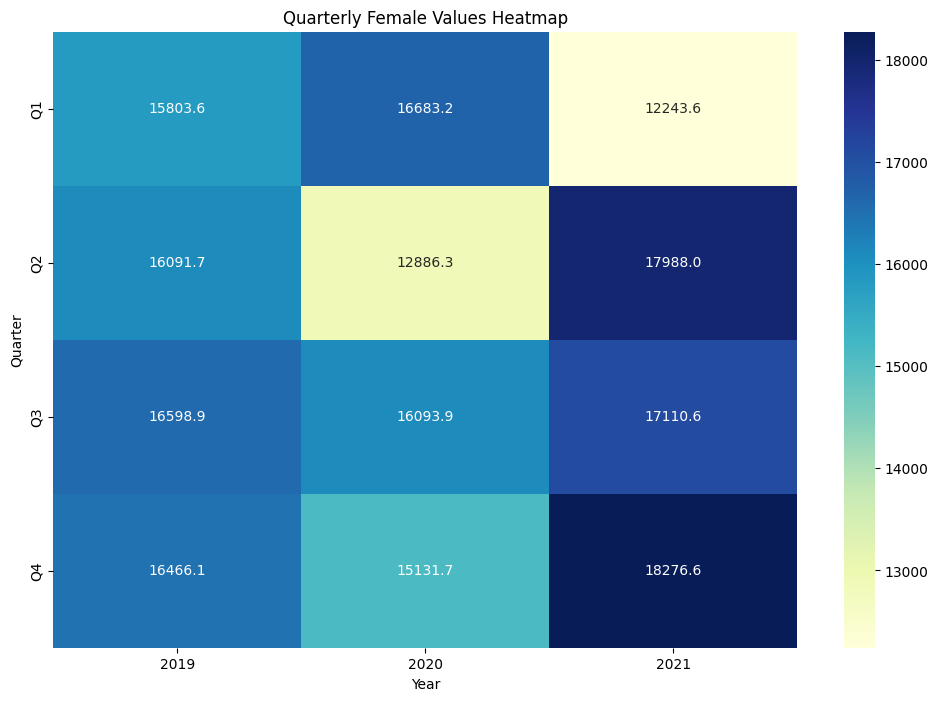

In [47]:
quarterly_data = df.pivot_table(index="Quarter", columns="Year", values="Female", aggfunc='sum')  # Change to "Male" for male values

plt.figure(figsize=(12, 8))
sns.heatmap(quarterly_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Quarterly Female Values Heatmap')
plt.xlabel('Year')
plt.ylabel('Quarter')
plt.show()

>>**Quarterly Male Values Heatmap**

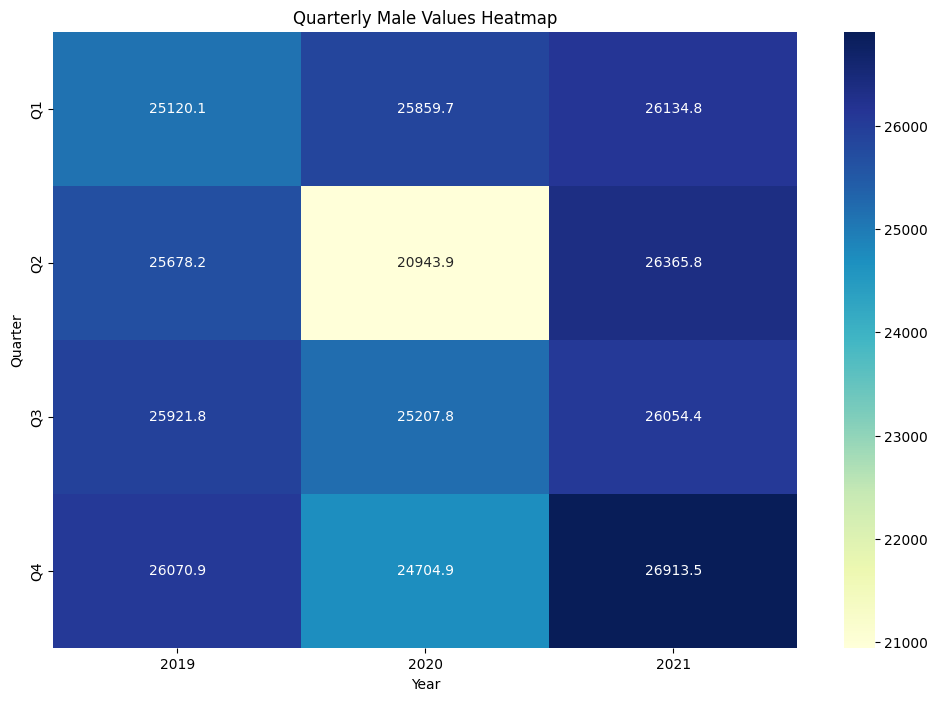

In [48]:
quarterly_data = df.pivot_table(index="Quarter", columns="Year", values="Male", aggfunc='sum')  # Change to "Male" for male values

plt.figure(figsize=(12, 8))
sns.heatmap(quarterly_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Quarterly Male Values Heatmap')
plt.xlabel('Year')
plt.ylabel('Quarter')
plt.show()

>>**Gender Ratio by Occupation and Region**

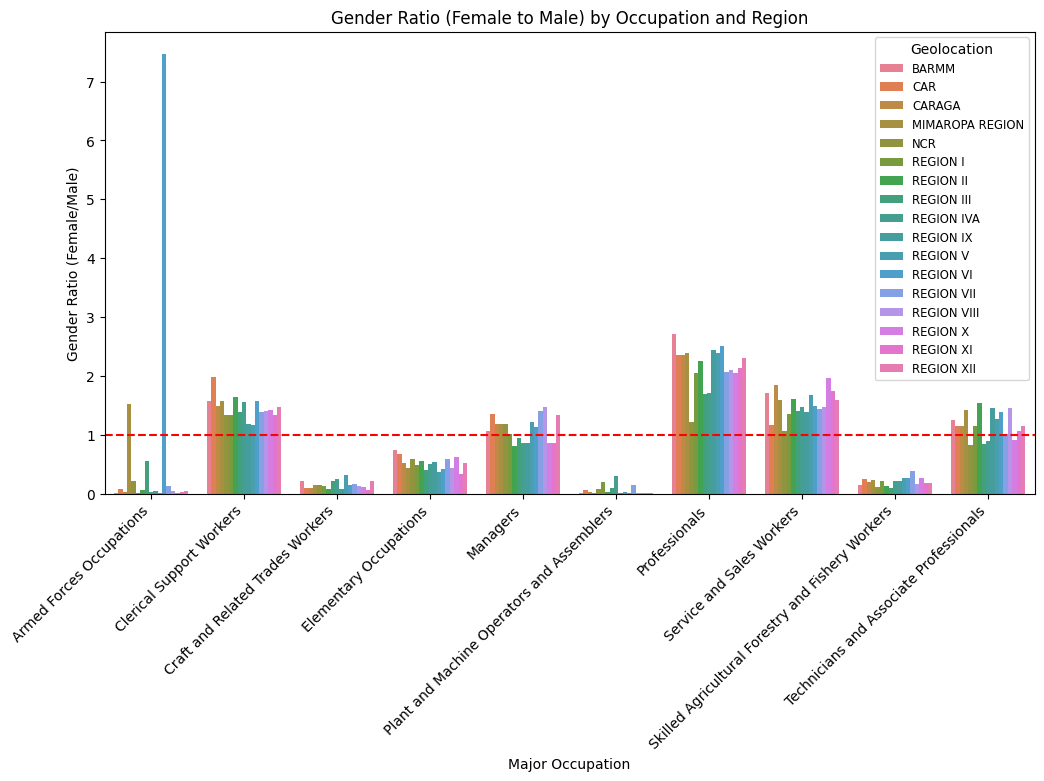

In [49]:
# Calculate Gender Ratio (Female to Male)
df['Gender Ratio'] = df['Female'] / df['Male']

# Group by Geolocation and Major Occupation to calculate average gender ratio
gender_ratio_df = df.groupby(['Geolocation', 'Major Occupation'])['Gender Ratio'].mean().reset_index()

# Plotting Gender Ratio
plt.figure(figsize=(12, 6))
sns.barplot(data=gender_ratio_df, x='Major Occupation', y='Gender Ratio', hue='Geolocation')
plt.title('Gender Ratio (Female to Male) by Occupation and Region')
plt.ylabel('Gender Ratio (Female/Male)')
plt.xlabel('Major Occupation')
plt.axhline(1, color='red', linestyle='--')  # Line at ratio = 1
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align x-ticks
plt.legend(title='Geolocation', fontsize='small', title_fontsize='medium', loc='upper right')  # Adjust legend size and position
plt.show()

**Stacked Bar Chart for Employment Distribution by Gender**

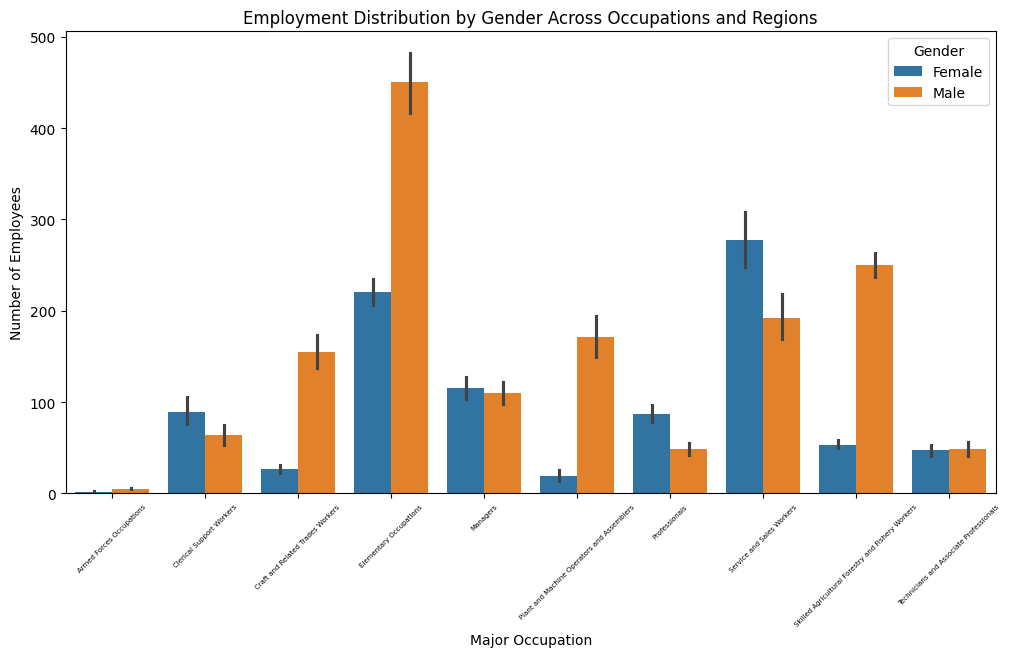

In [50]:
employment_distribution_df = df.melt(id_vars=['Geolocation', 'Major Occupation'],
                                      value_vars=['Female', 'Male'],
                                      var_name='Gender',
                                      value_name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=employment_distribution_df, x='Major Occupation', y='Count', hue='Gender')
plt.title('Employment Distribution by Gender Across Occupations and Regions')
plt.ylabel('Number of Employees')
plt.xlabel('Major Occupation')
plt.legend(title='Gender')
plt.xticks(rotation=45, fontsize=5)
plt.show()

In [51]:
# Time Series Analysis
# Melt the DataFrame for easier plotting
# time_series_df = df.melt(id_vars=['Year', 'Major Occupation'],
#                           value_vars=['Female', 'Male'],
#                           var_name='Gender',
#                           value_name='Count')

# # Plotting time series for each occupation
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=time_series_df, x='Year', y='Count', hue='Gender', style='Major Occupation', markers=True)
# plt.title('Trends in Employment Levels Over Years by Occupation and Gender')
# plt.ylabel('Number of Employees')
# plt.xlabel('Year')
# plt.legend(title='Gender and Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

**Employment Trends by Quarter and Gender**

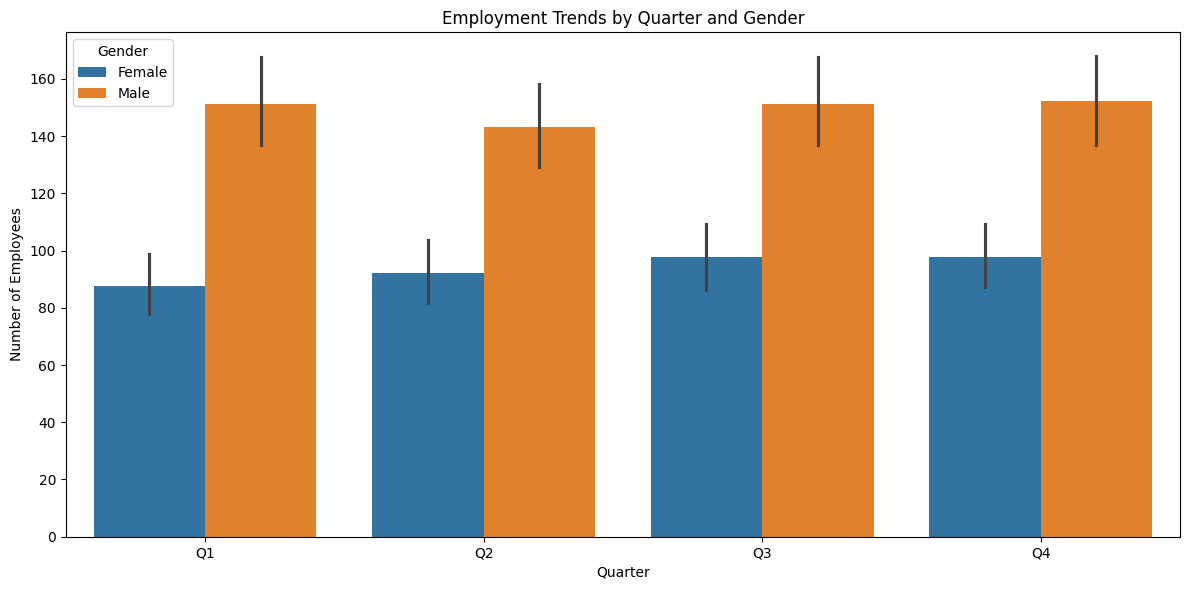

In [52]:
# Quarterly Trends
# Melt the DataFrame for quarterly analysis
quarterly_df = df.melt(id_vars=['Quarter', 'Major Occupation'],
                        value_vars=['Female', 'Male'],
                        var_name='Gender',
                        value_name='Count')

# Plotting quarterly trends
plt.figure(figsize=(12, 6))
sns.barplot(data=quarterly_df, x='Quarter', y='Count', hue='Gender')
plt.title('Employment Trends by Quarter and Gender')
plt.ylabel('Number of Employees')
plt.xlabel('Quarter')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

#### **Application of Proximity**

**Correlation**

**Distance Matrix**

>>**Euclidean Distance for Different Employment Figures**

In [61]:
from sklearn.metrics import pairwise_distances

# Select numerical columns for distance computation
employment_data = df[['Female', 'Male']].values

# Compute Euclidean distance matrix
euclidean_dist = pairwise_distances(employment_data, metric='euclidean')

# Convert to DataFrame for readability
euclidean_df = pd.DataFrame(euclidean_dist, index=df.index, columns=df.index)

euclidean_df.head()


,0,1,2,3,4,5,6,7,8,9,...,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
0,0.000000,3.414377,31.768695,186.569758,120.947204,44.842000,23.614905,63.092924,378.018581,5.062841,...,1.264641,49.597883,106.610480,546.244974,89.948442,151.878408,69.356814,297.914247,320.055949,36.556205
1,3.414377,0.000000,32.868421,186.942755,120.197042,46.389294,20.941640,61.577868,379.130027,4.685599,...,3.143854,47.224241,107.097577,545.755598,88.488701,153.317648,66.928464,295.812165,320.624788,34.767722
2,31.768695,32.868421,0.000000,155.398785,94.557728,14.385302,32.493092,45.702966,346.292924,28.225746,...,30.794621,44.266257,75.349253,517.459812,69.756175,120.545035,61.372118,280.496092,288.521524,29.090213
3,186.569758,186.942755,155.398785,0.000000,82.614404,144.996631,175.930943,138.402190,200.670929,182.299935,...,185.461954,160.246211,80.049534,368.193769,120.211544,64.519113,153.998928,208.829437,134.336172,160.129938
4,120.947204,120.197042,94.557728,82.614404,0.000000,90.278301,104.189472,61.783720,283.159535,116.016620,...,119.700133,83.146025,43.388676,425.903758,38.768008,93.155845,73.107007,194.810119,213.725271,87.619775


>>**Cosine Similarity for Employment Distributions across different entries**

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute Cosine similarity matrix
cosine_sim = cosine_similarity(employment_data)

# Convert to DataFrame for readability
cosine_sim_df = pd.DataFrame(cosine_sim, index=df.index, columns=df.index)

cosine_sim_df.head()


,0,1,2,3,4,5,6,7,8,9,...,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
0,1.000000,0.746293,0.990503,0.946749,0.797615,1.000000,0.373362,0.651161,0.994177,0.898111,...,0.986940,0.417361,0.956538,0.837196,0.656640,0.999936,0.381104,0.462677,0.963654,0.604981
1,0.746293,1.000000,0.830722,0.920863,0.996733,0.746293,0.896122,0.991121,0.813673,0.962972,...,0.843771,0.916348,0.907956,0.988822,0.992058,0.753793,0.899801,0.935381,0.896990,0.981485
2,0.990503,0.830722,1.000000,0.982026,0.872970,0.990503,0.497364,0.749324,0.999551,0.950046,...,0.999715,0.538341,0.987547,0.904439,0.754100,0.991998,0.504600,0.580172,0.991233,0.708712
3,0.946749,0.920863,0.982026,1.000000,0.949345,0.946749,0.652170,0.860844,0.975931,0.991879,...,0.986251,0.687727,0.999491,0.968702,0.864507,0.950339,0.658485,0.723477,0.998354,0.829133
4,0.797615,0.996733,0.872970,0.949345,1.000000,0.797615,0.857348,0.977143,0.857967,0.981601,...,0.884363,0.881016,0.938837,0.997634,0.978657,0.804404,0.861621,0.903761,0.929763,0.962807


In [59]:
cosine_sim_df.to_csv("cosine_similarity_matrix.csv")
euclidean_df.to_csv("euclidean_matrix.csv")

#### **Association Rule Mining**